## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [532]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [533]:
#Reading the dataset 
df_ab = pd.read_csv('ab_data.csv')
df_ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [534]:
#columns in the dataset 
df_ab.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [535]:
#info about the dataset 
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [536]:
# the number of rows 
df_ab.shape

(294478, 5)

c. The number of unique users in the dataset.

In [537]:
#unique users in the dataset
uni_users=df_ab.user_id.nunique()
uni_users

290584

In [538]:
difference_tot = df_ab.shape[0] - uni_users
difference_tot

3894

### * Probability : Observation 1 ;
#### - difference between total number of rows and unique users.

d. The proportion of users converted.

In [539]:
# proportion of users converted
df_ab.converted.sum() / df_ab.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [540]:
# number of times the new_page and treatment don't line up
dont_match1 = df_ab[(df_ab.landing_page == 'new_page') & (df_ab.group != 'treatment')]
dont_match1.group.count()

1928

In [541]:
dont_match2 = df_ab[(df_ab.landing_page != 'new_page') & (df_ab.group == 'treatment')]
dont_match2.group.count()

1965

In [542]:
# number of rows don't line up.
dont_match1.group.count() + dont_match2.group.count()

3893

### * Probability : Observation 2 ;
#### - The number of rows (3893) are near to the number of difference between total number of rows and unique users(3894).

f. Do any of the rows have missing values?

In [543]:
#check for missing values
df_ab.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### * Probability : Observation 3 ;
#### - We don't have missing valus in our dataset

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [544]:
#  Store a new dataframe in df2
df2 = df_ab.copy()

In [545]:
# drop the rows don't line up with new_page and treatment 
df2.drop(dont_match1.index, inplace=True)
df2.drop(dont_match2.index, inplace=True)

In [546]:
df2.shape , df_ab.shape 

((290585, 5), (294478, 5))

In [547]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [548]:
# number of  unique user_ids
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [549]:
# find one user_id repeated in our dataframe
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [550]:
# the repeat user_id
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [551]:
# remove the duplicate user_id
df2.drop_duplicates(subset=['user_id'], inplace=True)

In [552]:
# check the user_id was removed
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted


In [553]:
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [554]:
# probability of an individual converting regardless of the page they receive
total_conv = df2.shape[0]
df2[df2.converted == 1].converted.count() / total_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [555]:
# the probability of control they converted
n_control = df2.query('group == "control"').shape[0]
p_control = df2.query('converted == 1 & group == "control"').converted.count() / n_control
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [556]:
# the probability of treatment they converted
n_treatment = df2.query('group == "treatment"').shape[0]
p_treatment = df2.query('converted == 1 & group == "treatment"').converted.count() / n_treatment
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [557]:
# probability that an individual received the new page
df2.query('group == "treatment"').user_id.count() / total_conv

0.5000619442226688

In [558]:
df2.query('group == "control"').user_id.count()

145274

In [559]:
# Difference in conversion probability between the new page and the old one i
obs_diff = p_treatment - p_control
obs_diff

-0.0015782389853555567

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

### * Statistical Insights ;

#### - Conversion rate for Individual users in the "treatment" group is: 0.1188.
#### - Conversion rate for individual users in the "control" group is: 0.1203.
#### - the convertion rate in old page is tiny higher than new page with 0.0015.
#### - Reaching rate for  the "new page" is: 0.50006.

### * Evidence ;

#### - That is means the both pages has almost equal reaching rate.
#### - the difference between conversion rate for pages is too small and, that is not a strong evidence to say " the new page more conversions than the old page.  "


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### $H_0: p_{new} <= p_{old} $

### $H_1: p_{new} > p_{old} $

## Or

### $H_0: p_{new} - p_{old} \leq 0 $

### $H_1: p_{new} - p_{old} >   0 $


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [560]:
# the convert rate for  𝑝𝑛𝑒𝑤  under the null
p_new = df2.query('converted == 1').converted.count() /df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [561]:
# convert rate for  𝑝𝑜𝑙𝑑  under the null
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [562]:
# number of 𝑛𝑛𝑒𝑤
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [563]:
# number of 𝑛𝑜𝑙𝑑 
n_old = df2.query('group == "control"').shape[0]
n_old

145274

In [564]:
#difference between n_new" and "n_old"
difference_n_o = n_new - n_old
display("Difference between the two arrays values is :",(difference_n_o))

'Difference between the two arrays values is :'

36

### * A/B Test : Observation 1 ;
#### - "n_new" and "n_old" have difference number of values and, we need to unify this difference to prepare our data to simulate it.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [565]:
# Store these  𝑛𝑛𝑒𝑤  1's and 0's in new_page_converted.
new_page_converted = np.random.choice([0,1], size=n_new, p=[(1-p_new),p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [566]:
# Store these 𝑛𝑜𝑙𝑑  1's and 0's in old_page_converted.
old_page_converted = np.random.choice([0,1], size=n_old, p=[(1-p_old),p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [567]:
# 𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑
(new_page_converted.sum()/n_new) - (old_page_converted.sum()/n_old) 

-0.004207391330620855

In [568]:
# Unify the two arrays size by truncating n_new array values:
Unify_new_conv= new_page_converted[:145274]
len(Unify_new_conv)

145274

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [569]:
df2.shape[0]

290584

In [570]:
#Simulate 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  values
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[(1-p_new),p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[(1-p_old),p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

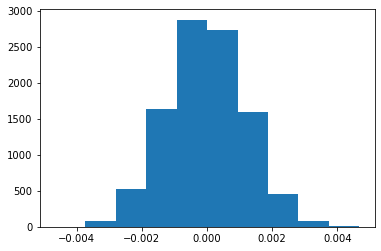

In [571]:
# Plot a histogram of the p_diffs
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

### * A/B Test : Observation 2 ;
#### The Probability of difference follows the normal distribution, as what we expected and, follows the central limit theorem.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

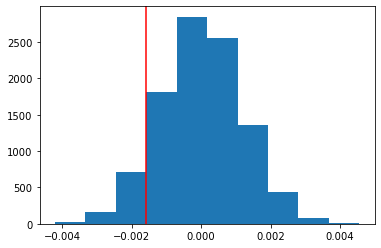

In [572]:
obs_diff = p_treatment - p_control
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')

In [573]:
#p-value
p_val = (null_vals > obs_diff).mean()
p_val

0.9099

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

##### - p_val is called a p_value 
##### - the p-value must be less than alpha (type 1 error) 5, to reject the null favor the alternative 
##### - when when the p-value greater than than 5%, we fail to reject the null because  the sample did not has evidence
##### - the new page has a higher conversion rate than the old page

##### - based on the hypothesis test and sample data, we reach to the new page has not good effect and, we should launch the old page  


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [574]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1').shape[0]
convert_new = df2.query('group == "treatment" & converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [575]:
z_score ,p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative ="larger")
z_score ,p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

##### - The z-score and p-value findings agree with what we found in parts j and k.
##### - Our p-value is too large which suggests our statistic is likely to come from the null hypothesis.
##### - We fail to reject the null hypothesis and conclude that the new page is not better than the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

##### i will use the logistic regression because the data type variable between: converted & not converted.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [576]:
# Adding an intercept column
df2['intercept'] = 1
## creating a dummy variable column
df2['page_ab'] = pd.get_dummies(df2['landing_page'])['new_page']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,page_ab
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [577]:
log_reg = sm.Logit(df2['converted'], df2[['intercept', 'page_ab']])
results = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [578]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        21:14:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
page_ab       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### The Null and alternative hypotheses associated with Logistic regression model are those Hypotheses:

### $H_0:$ 
#### No relatiomship between X=page_ab and Y=converted 

### $H_a:$ 
#### A strong relatiomship between X=page_ab and Y=converted 


### $H_0: B1 =0  $

### $H_a: B1 !=0  $


### * Logistic regression Hypotheses(L.R-H) VS A/B Test Hypotheses (A/B.T-H):
** (L.R-H) Focuses on Estimating existence of "Relationship" between a dependent (target) and an independent variable(predictor) Which is reflected via (L.R-H) as:

- Conversion rate via New page Equals Conversion rate via Old page (Null_Hypothesis) OR Not Equal (Alternative). while (A/B.T-H) focuses on "Distribution" of more than one variable.

- Also: Since (L.R-H) are dual tailed hypotheses while (A/B.T-H) are single tailed ones in this case, P_values will be different (Much Lower) which is obvious in the P_value of (L.R-H) variable ("page_ab") = [0.190] while (A/B.T-H) P_value = [0.9050].

- The p-value which associated with ("page_ab") is again larger than the Alpha level of business (0.05) which suggests that: there is no significant impact on conversion rate related to difference in landing pages, hence we should fail to reject the Null Hypothesis

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### A- Advantage of adding more explanatory variables into regression model:
Adding more factors Enhances The Logistic Regression Model capability of providing quantified value for the strength of the association for all the explanatory variables( i.e: considering other information about users such as: sex, age, country. ont only could reveal hidden value to the coversion via new page for specific group of the users but also can provide a quantified value)

#### B- Disadvantages of adding more explanatory variables into regression model:
One of disadvantages and procautions of adding new factors is the defficulty in avoiding "multicollinearity" which happens when the independent variables correlate with one another, which leads to "flipped relation" between the response and predictors(i.e income and age can take negative coefficient values because the are highly linearly related).

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [580]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [581]:
countries_df.shape

(290584, 2)

In [582]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,page_ab
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [583]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [584]:
df_new[['US','UK','CA']] = pd.get_dummies(df_new['country'])[['US','UK','CA']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,page_ab,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


### Does it appear that country had an impact on conversion?
#### Answer:
##### To find out we will add a ("country") factor to the logistic regression model as the following.

In [594]:
X= df_new["converted"]
Y= df_new[["intercept", "page_ab", "CA", "UK"]]
logist_mod= sm.Logit(X, Y)
out_come= logist_mod.fit();

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [596]:
out_come.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        23:12:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
page_ab       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

#### - The p-values which associated with ("page_ab", "countries") are:

##### - "page_ab" = (0.191), "CA"= (0.130), "UK"= (0.457 )
##### - Again each one of them is larger than the Alpha level of business (0.05) which suggests that: there is no significant impact on conversion rate related to difference in landing pages or countries, hence we should fail to reject the Null Hypothesis


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [589]:
df_new['uk_ab'] = df_new['page_ab'] * df_new['UK']
df_new['ca_ab'] = df_new['page_ab'] * df_new["CA"]
df_new.sample(4)

,country,timestamp,group,landing_page,converted,intercept,page_ab,US,UK,CA,uk_ab,ca_ab
user_id,,,,,,,,,,,,
899229,UK,2017-01-08 16:29:24.223540,treatment,new_page,0,1,1,0,1,0,1,0
846439,UK,2017-01-09 00:52:14.573698,treatment,new_page,1,1,1,0,1,0,1,0
833564,US,2017-01-11 04:53:20.808599,treatment,new_page,1,1,1,1,0,0,0,0
906729,UK,2017-01-11 02:25:28.285785,treatment,new_page,0,1,1,0,1,0,1,0


In [586]:
### Fit Your Linear Model And Obtain the Results
log_reg2= sm.Logit(df_new['converted'], df_new[['intercept', 'page_ab', 'UK', 'CA', 'uk_ab','ca_ab']])
df_n =log_reg2.fit()
df_n.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        21:14:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
page_ab       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
uk_ab          0.0314      0.027      1.181      0.238      -0.021       0.084
ca_ab         -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

In [587]:
# interaction between page and country to see if there significant effects on conversion
1/np.exp(df_n.params)

intercept    7.289813
page_ab      1.020776
UK           1.005761
CA           1.017682
uk_ab        0.969090
ca_ab        1.048001
dtype: float64

### Logistic Regression Model Interpretation for interaction between page and country :

#### - For each one unit "Decrease" in (ca_ab), conversion is (1.048001) times as likely , holding all else constant.
#### - P_value of (ca_ab) is larger than (0.05) "(α level)" as well as other predictors. Therefore we find that the interactions between page and country have no significant effects on conversion rate and we still fail to reject the Null Hypotheses.

<a id='conclusions'></a>
## Conclusions

#### - based on the avaliable data. i have not enough evidence to suggest (the new page provides more conversion rate than the old page).
#### - but i find the old page provide more conversions with little positive margin. so i suggest (fail to reject the null hypotheses)